# WeatherPy
----

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Import citipy to generate city names from randomly generated coordinates
from citipy import citipy

# CSV export path
output_data_file = "output_data/cities.csv"

# Ranges for latitude and longitude generator
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating random cities

In [2]:
# List for storing coordinates and city names
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

## Calling OpenWeather API using random cities list


In [3]:
# Constructing base query url for OpenWeather API
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q='

# List to populate with weather values
weather_list = []

# Looping through citipy generated cities as OpenWeather API parameters
for i in cities:
    response = requests.get(base_url + i).json()
    try:
        weather_list.append([response['name'], response['sys']['country'], response['coord']['lat'], response['coord']['lon'],
                           response['main']['temp_max'], response['main']['humidity'], response['wind']['speed'],
                           response['clouds']['all']])
        print(f"Checking city #{cities.index(i) + 1}: {i.title()}, {response['sys']['country']}")
    except:
        print("City not found. Next city...")

Checking city #1: Severo-Kurilsk, RU
Checking city #2: Rikitea, PF
Checking city #3: Pevek, RU
Checking city #4: Magdalena, PH
Checking city #5: Mataura, NZ
Checking city #6: Ribeira Grande, PT
Checking city #7: Castro, BR
Checking city #8: Sao Filipe, CV
Checking city #9: Vaini, TO
Checking city #10: Kapaa, US
Checking city #11: Bluff, NZ
Checking city #12: Ushuaia, AR
Checking city #13: Atuona, PF
Checking city #14: Estacion Coahuila, MX
City not found. Next city...
City not found. Next city...
Checking city #17: Thompson, CA
Checking city #18: Faanui, PF
Checking city #19: Dhidhdhoo, MV
Checking city #20: Berlevag, NO
City not found. Next city...
Checking city #22: Aleksandrov Gay, RU
Checking city #23: Strizhi, RU
City not found. Next city...
Checking city #25: Linjiang, CN
Checking city #26: Port Elizabeth, ZA
Checking city #27: Anadyr, RU
Checking city #28: Wajir, KE
Checking city #29: Port Alfred, ZA
Checking city #30: Atar, MR
City not found. Next city...
City not found. Next c

Checking city #252: Lucapa, AO
Checking city #253: Tura, IN
Checking city #254: Vestmannaeyjar, IS
Checking city #255: Maceio, BR
Checking city #256: Yerofey Pavlovich, RU
Checking city #257: Sidi Ali, DZ
Checking city #258: Abu Zabad, SD
Checking city #259: Tucurui, BR
Checking city #260: Kirakira, SB
Checking city #261: Petropavl, KZ
Checking city #262: Takaka, NZ
Checking city #263: Campos Novos, BR
Checking city #264: Matinhos, BR
Checking city #265: Siderno, IT
Checking city #266: Bartica, GY
Checking city #267: Vanavara, RU
Checking city #268: Ahuimanu, US
Checking city #269: Medak, IN
Checking city #270: Codrington, AU
Checking city #271: Yunyang, CN
Checking city #272: Butuan, PH
Checking city #273: Kidal, ML
Checking city #274: Cascais, PT
Checking city #275: Cherskiy, RU
Checking city #276: Jamestown, US
Checking city #277: Katobu, ID
Checking city #278: Kloulklubed, PW
City not found. Next city...
Checking city #280: Ilulissat, GL
Checking city #281: Whitehorse, CA
Checking 

Checking city #502: Bereda, ES
Checking city #503: Manzil Salim, TN
Checking city #504: Uvat, RU
Checking city #505: Popondetta, PG
Checking city #506: North Bend, US
Checking city #507: Lewistown, US
Checking city #508: Nome, US
Checking city #509: Pandan, PH
Checking city #510: Khasan, RU
Checking city #511: Ambilobe, MG
Checking city #512: Prescott, US
Checking city #513: Mecca, SA
Checking city #514: Shimoda, JP
City not found. Next city...
Checking city #516: Palasa, IN
Checking city #517: Kropotkin, RU
Checking city #518: Oswego, US
Checking city #519: Santiago, CL
City not found. Next city...
City not found. Next city...
Checking city #522: Hovd, MN
Checking city #523: Touros, BR
Checking city #524: Ahtopol, BG
Checking city #525: Tivaouane, SN
Checking city #526: Rapid Valley, US
Checking city #527: Santo Augusto, BR
Checking city #528: Albion, US
City not found. Next city...
Checking city #530: Midland, US
Checking city #531: Halifax, CA
Checking city #532: Harrison, US
Checki

## Weather dataframe and output

In [4]:
# Converting weather data list to dataframe
weather_df = pd.DataFrame(weather_list, columns=['City', 'Country', 'Latitude', 'Longitude', 'Max Temp (F)', 
                                                 'Humidity %', 'Wind (mph)', 'Cloudiness %'])

In [5]:
# Output of weather dataframe for VacationPy exercise
weather_df.to_csv(output_data_file)

In [6]:
weather_df.head(10)

,City,Country,Latitude,Longitude,Max Temp (F),Humidity %,Wind (mph),Cloudiness %
0,Severo-Kuril'sk,RU,50.68,156.12,54.01,91,9.48,100
1,Rikitea,PF,-23.12,-134.97,72.82,79,14.25,81
2,Pevek,RU,69.70,170.31,37.42,93,3.51,100
3,Magdalena,PH,14.20,121.43,80.60,88,2.24,95
4,Mataura,NZ,-46.19,168.86,52.05,88,1.81,34
5,Ribeira Grande,PT,38.52,-28.70,72.14,83,9.71,3
6,Castro,BR,-24.79,-50.01,53.08,74,3.78,0
7,São Filipe,CV,14.90,-24.50,78.39,87,6.58,59
8,Vaini,TO,-21.20,-175.20,77.00,78,13.87,75
9,Kapaa,US,22.08,-159.32,82.40,65,14.99,90


## Comparing latitude values across different weather dimensions

In [7]:
# Creating scatterplot builder function
def scatter_builder(x_axis, y_axis):
    # Plot size
    plt.figure(figsize=(12,8))
    # Plot constructor
    weather_scatter = plt.scatter(weather_df[x_axis], weather_df[y_axis], edgecolors='black')
    # Plot formatting
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'{x_axis} to {y_axis} on (8/02/2020)')
    # Save output chart as .png
    path = f'output_data/{x_axis[0]}_{y_axis[0]}_scatter.png'
    plt.savefig(path, format='png')
    # Plot display
    plt.show()

### Latitude vs. Max Temperature

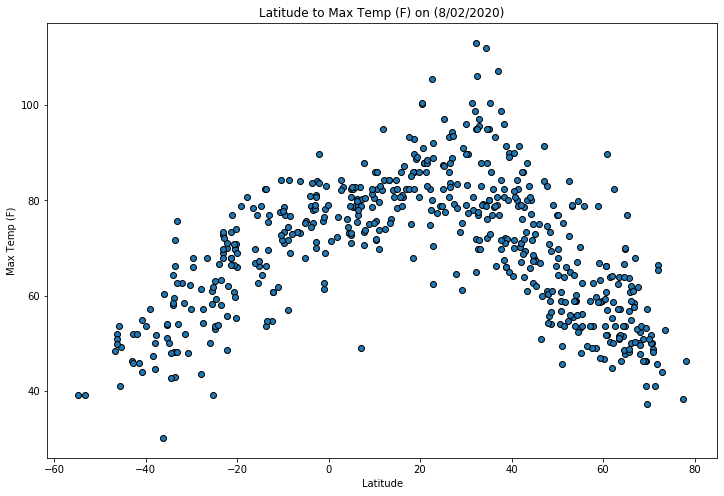

In [8]:
scatter_builder('Latitude', 'Max Temp (F)')

Plotting changes in max daily temperature across all latitudinal values. We see that temperature trends higher the closer the latitude is to 0, increasing from negative latitude values and decreasing as we go over zero.

### Latitude vs. Humidity

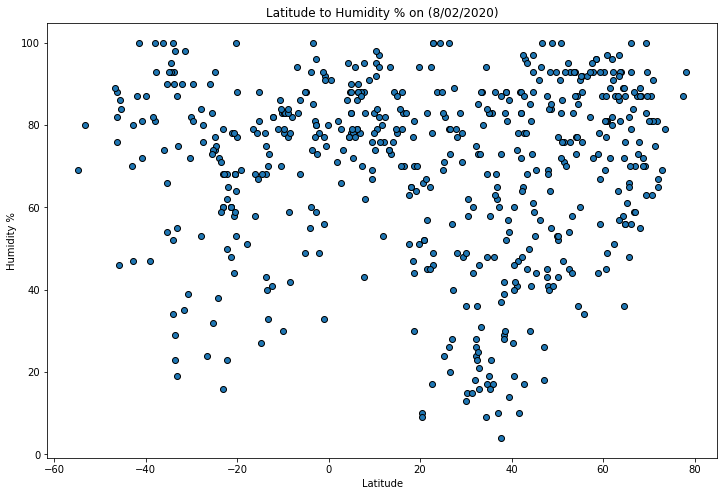

In [9]:
scatter_builder('Latitude', 'Humidity %')

Plotting changes in humidity saturation across all latitudinal values. The extremes and near-0 latitudes trend towards higher humidity values, while middle latitudes show lower cluster values.

### Latitude vs. Cloudiness

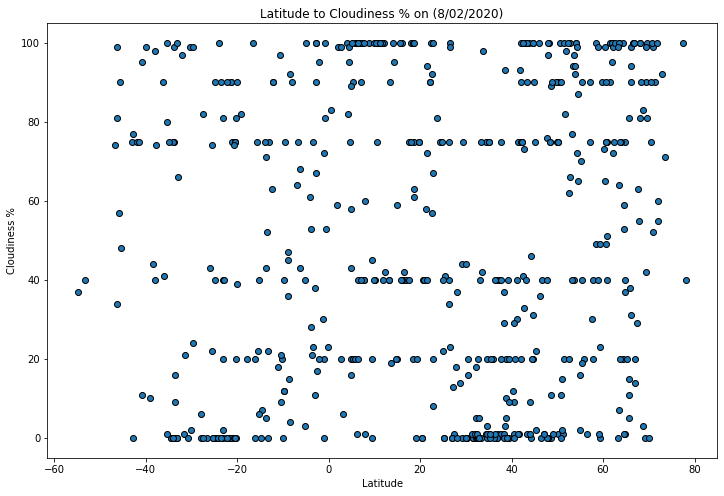

In [10]:
scatter_builder('Latitude', 'Cloudiness %')

Plotting changes in cloud cover across all latitudinal values. Cloud cover is distributed starkly across most latitudinal values, with tight cloudless clusters in the middle latitudes and high amounts of cloud cover in the extreme and 0-10 latitudes.

### Latitude vs. Wind Speed

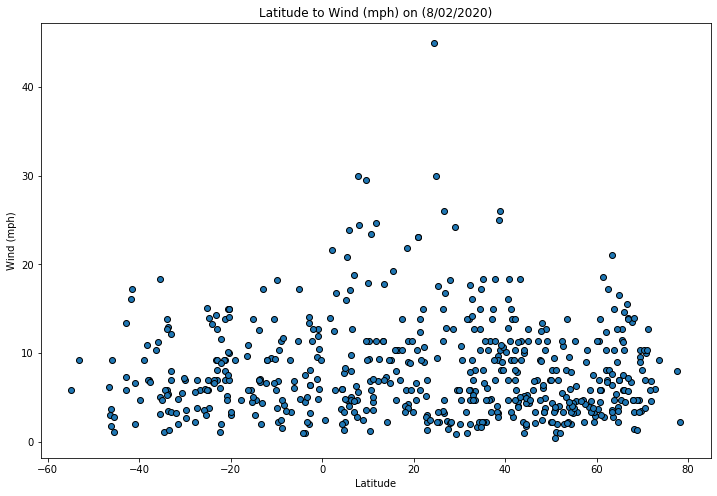

In [11]:
scatter_builder('Latitude', 'Wind (mph)')

Plotting changes in wind speed in miles per hour across all latitudinal values. Wind speeds appear to show nearly no correlation with latitude.

## Linear Regression

In [12]:
# Creating linear regression function
def regression_plotter(hemisphere, x_axis, y_axis):
    # Storing column references into variables
    x = hemisphere[x_axis]
    y = hemisphere[y_axis]
    # Building scatterplot
    plt.figure(figsize=(12,8))
    plt.scatter(x, y, edgecolors='black')
    # Extracting and plotting regression variables
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x, regress_values, "r-", alpha=.75)
    # Plot formatting
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'{x_axis} to {y_axis} on (8/02/2020)')
    plt.annotate(line_eq, (x.min() + 5, y.min() + 10), fontsize=14,color="red")
    print(f'The r-squared value is {rvalue**2}')
    if hemisphere.iloc[1, 2] > 0:
        path = f'output_data/northern_{x_axis[0]}_{y_axis[0]}_regression.png'
    else:
        path = f'output_data/southern_{x_axis[0]}_{y_axis[0]}_regression.png'
    plt.savefig(path, format='png')
    plt.show()

In [13]:
# Creating Northern and Southern Hemisphere DataFrames
northern = weather_df.loc[weather_df['Latitude'] > 0, :]
southern = weather_df.loc[weather_df['Latitude'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.44622744782993856


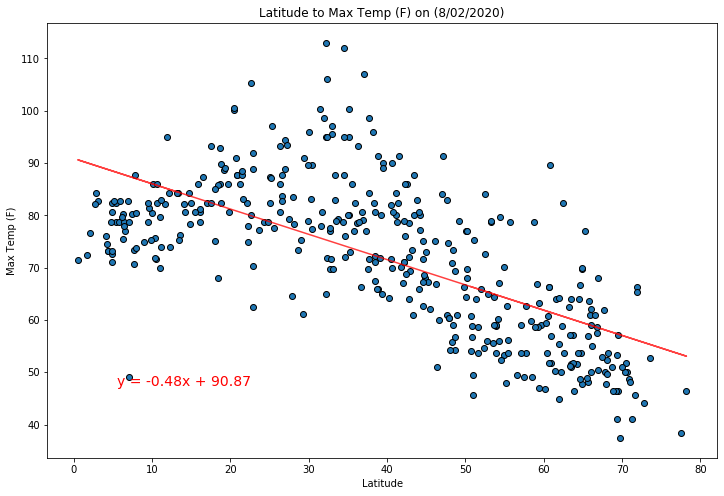

In [14]:
regression_plotter(northern, 'Latitude', 'Max Temp (F)')

Changes in max temperature by latitude in the northern hemisphere. We see a strong negative correlation with each successive increase in latitudinal value. Moving north trends towards a lower temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.602434130632233


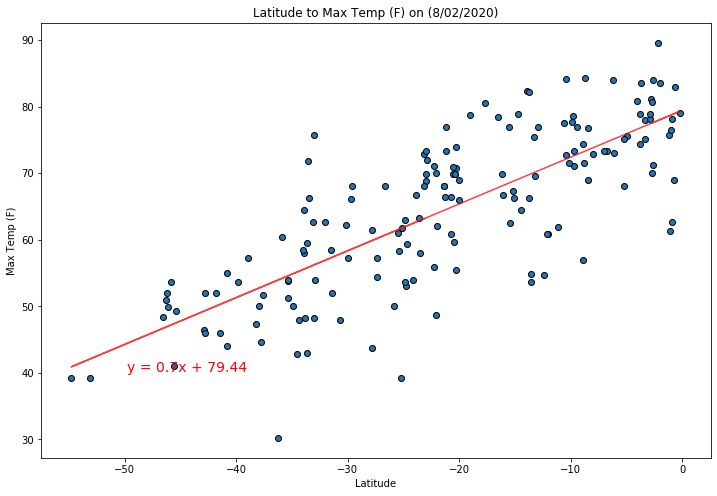

In [15]:
regression_plotter(southern, 'Latitude', 'Max Temp (F)')

Changes in max temperature by latitude in the southern hemisphere. We see a strong positive correlation with each successive increase in latitudinal value. Approaching 0 latitude trends towards a warmer temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.0030954195107037357


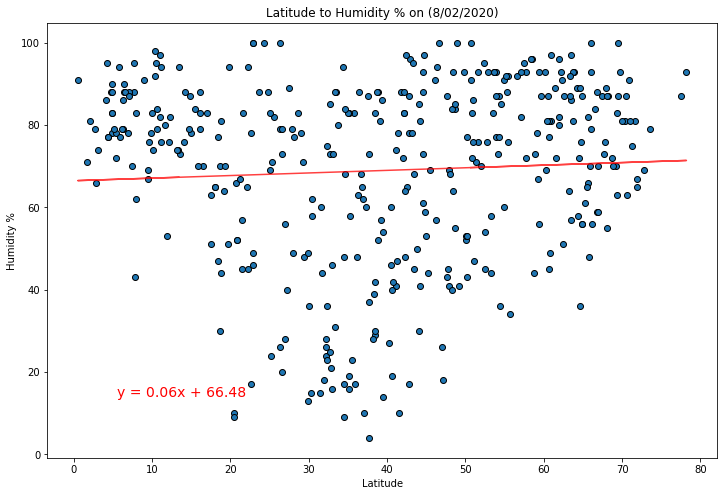

In [16]:
regression_plotter(northern, 'Latitude', 'Humidity %')

Changes in humidity saturation across latitudinal values in the northern hemisphere. Statistically speaking, latitude does not correlate to siginificant changes in humidity, but there is an observable cluster of lower humidity in the middle latitudes.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.00048285081711317253


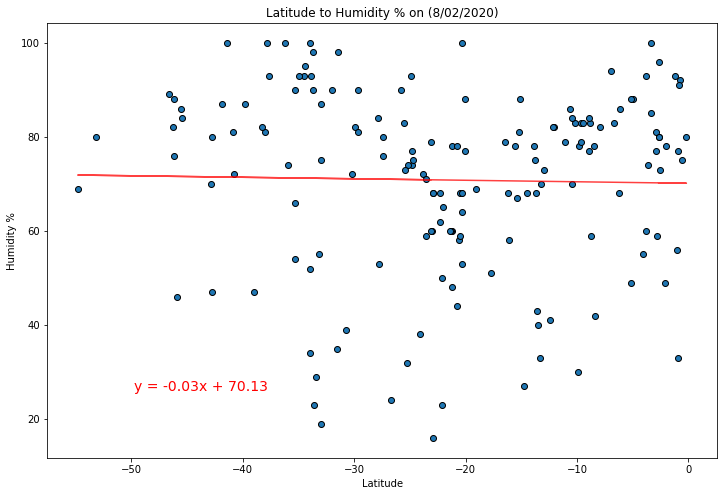

In [17]:
regression_plotter(southern, 'Latitude', 'Humidity %')

Changes in humidity saturation across latitudinal values in the southern hemisphere. Changes in latitude does show a weak negative correlation to changes in humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.0020274455089622123


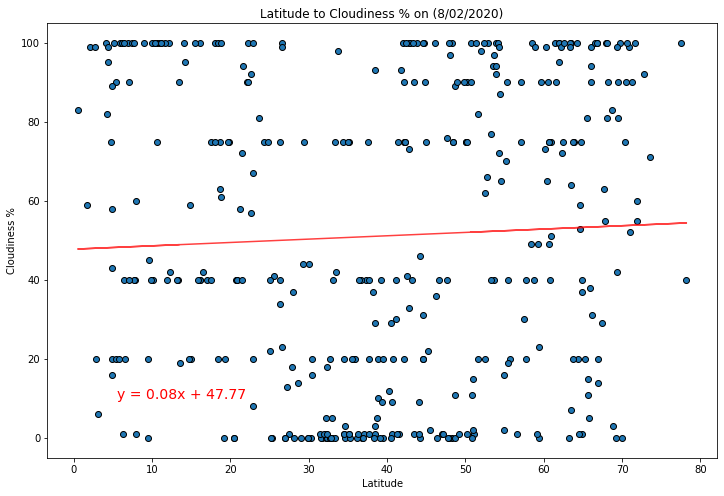

In [18]:
regression_plotter(northern, 'Latitude', 'Cloudiness %')

Changes in cloud cover across latitudinal values in the northern hemisphere. Statistically speaking, latitude does not correlate to siginificant changes in cloud cover, but there is an observable cluster of near-zero cloud cover in the middle latitudes, as well as some clustering of high cloud cover in the extreme latitudes.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.0008662720927278046


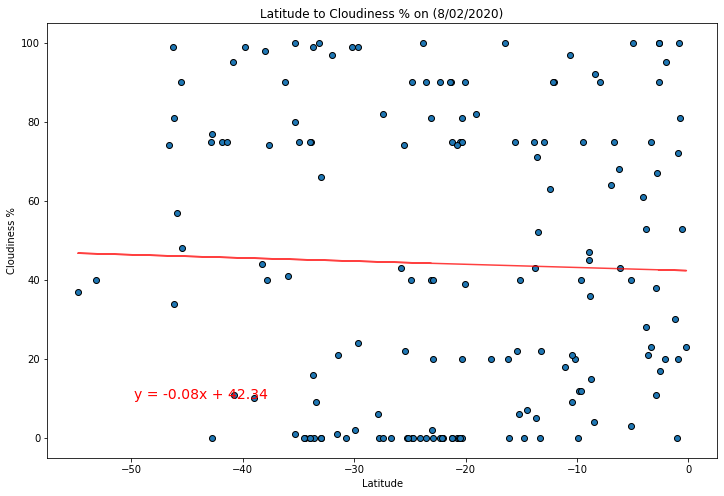

In [19]:
regression_plotter(southern, 'Latitude', 'Cloudiness %')

Changes in cloud cover across latitudinal values in the southern hemisphere. Changes in latitude show a weak negative correlation to changes in cloud cover, with a significant cluster of near-zero cloud cover in the higher latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.030783474488197137


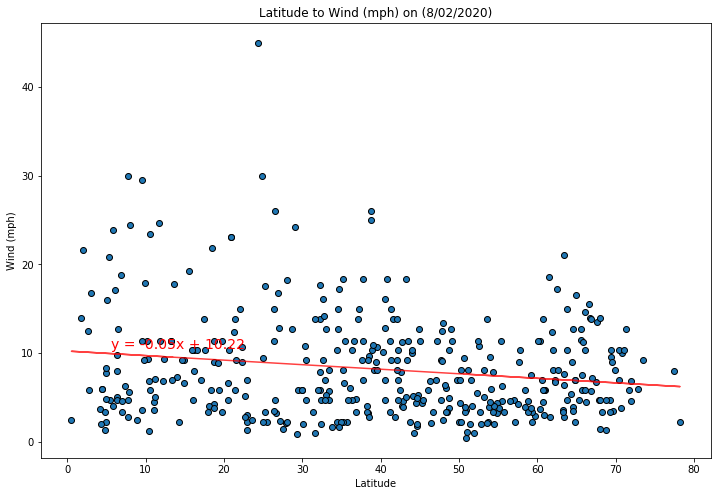

In [20]:
regression_plotter(northern, 'Latitude', 'Wind (mph)')

Changes in wind speed across latitudinal values in the northern hemisphere. There is a no significant correlation in the distribution.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.005404931722435205


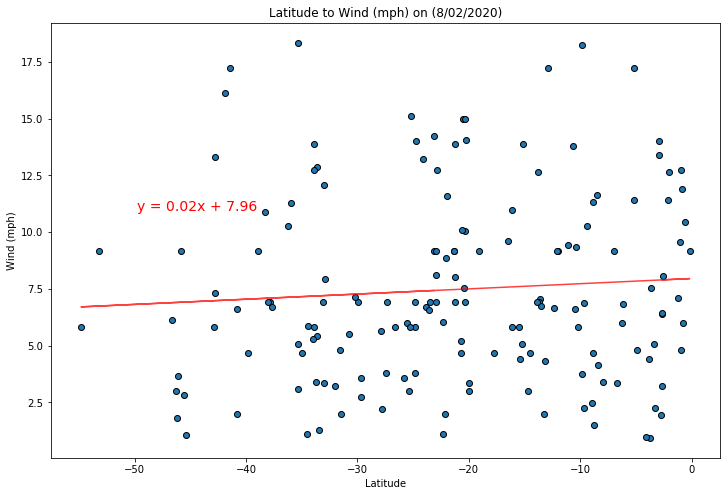

In [21]:
regression_plotter(southern, 'Latitude', 'Wind (mph)')

Changes in wind speed across latitudinal values in the southern hemisphere. There is a no significant correlation in the distribution.

# Findings Summary
------

- Classifying our regressive analyses by hemisphere is incredibly important. Due to the 0-center scale of latitudinal values, any regression analysis would be next to impossible across all values, as the results of regression on positive latitudinal values would cancel out the negative latitudinal values. This is important to remember for any dataset with a 0-center value.

- The strongest statistically describable correlations can be found in comparisons between temperature and latitude, but there also exists a not insignificant degree of clustering in comparisons between humidity and latitude. This demonstrates the importance of drawing conclusions from more than one type of analysis, as simple Pearson's r values won't show the wave-like shape variation in the humidity data.

- There is also visual clustering in the cloud cover data, but I would chalk this down to cloud cover data being in integer format. Without the continuous nature of non-integer datatypes, line clustering looks more significant than I think it actually is.